In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(0)

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train.shape

(60000,)

In [7]:
assert(X_train.shape[0] == y_train.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_test.shape[0] == y_test.shape[0]),"이미지의 숫자와 라벨의 숫자가 일치하지 않는다"
assert(X_train.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"
assert(X_test.shape[1:] ==(28,28)), "이미지의 크기가 28*28이아니다"

(5923, 28, 28)
(6742, 28, 28)
(5958, 28, 28)
(6131, 28, 28)
(5842, 28, 28)
(5421, 28, 28)
(5918, 28, 28)
(6265, 28, 28)
(5851, 28, 28)
(5949, 28, 28)


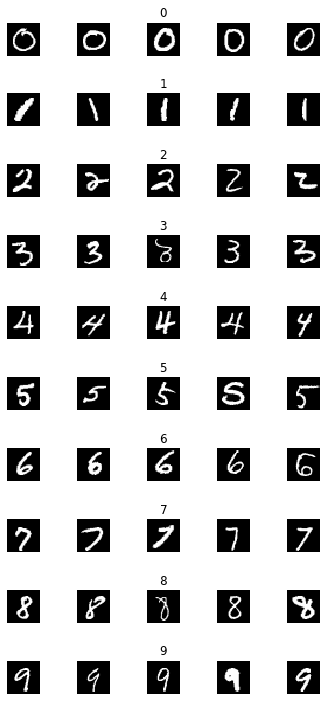

In [8]:
num_of_samples = []
cols = 5
num_class = 10
fig,axes = plt.subplots(nrows=num_class, ncols=cols, figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_class):
        x_selected = X_train[y_train == j]
        axes[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)),:,:],cmap='gray')
        axes[j][i].axis("off")
        if i== 2:
            axes[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
            print(x_selected.shape)

Text(0, 0.5, 'Number of image')

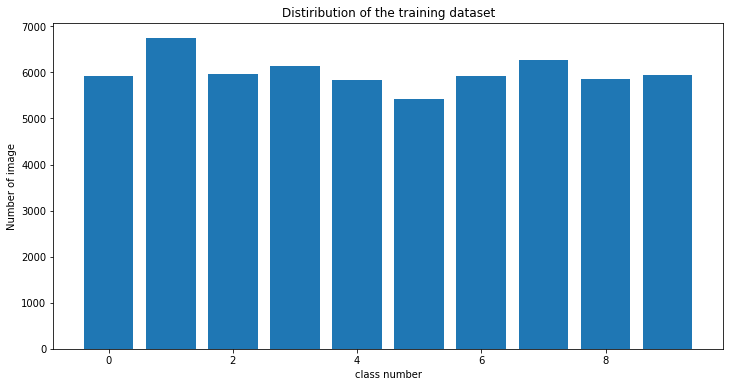

In [9]:
num_of_samples
plt.figure(figsize=(12,6))
plt.bar(range(0,10),num_of_samples)
plt.title('Distiribution of the training dataset')
plt.xlabel("class number")
plt.ylabel("Number of image")

In [10]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1)

In [13]:
X_train_flatten.shape

(60000, 784)

In [14]:
X_test_flatten = X_test.reshape(X_test.shape[0],-1)

In [15]:
X_train = X_train_flatten
X_test = X_test_flatten

In [16]:
def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim=X_train.shape[1],activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    
    model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [17]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                23550     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
history = model.fit(X_train,y_train,validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 1s 13us/sample - loss: 0.3334 - accuracy: 0.9008 - val_loss: 0.1613 - val_accuracy: 0.9538
Epoch 2/10
54000/54000 [==============================] - 0s 7us/sample - loss: 0.1669 - accuracy: 0.9498 - val_loss: 0.1377 - val_accuracy: 0.9637
Epoch 3/10
54000/54000 [==============================] - 0s 8us/sample - loss: 0.1393 - accuracy: 0.9580 - val_loss: 0.1253 - val_accuracy: 0.9607
Epoch 4/10
54000/54000 [==============================] - 0s 7us/sample - loss: 0.1168 - accuracy: 0.9649 - val_loss: 0.1144 - val_accuracy: 0.9655
Epoch 5/10
54000/54000 [==============================] - 0s 6us/sample - loss: 0.1066 - accuracy: 0.9676 - val_loss: 0.1141 - val_accuracy: 0.9685
Epoch 6/10
54000/54000 [==============================] - 0s 6us/sample - loss: 0.0984 - accuracy: 0.9693 - val_loss: 0.1369 - val_accuracy: 0.9588
Epoch 7/10
54000/54000 [==============================] - 0s 7

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame(model.history.history)

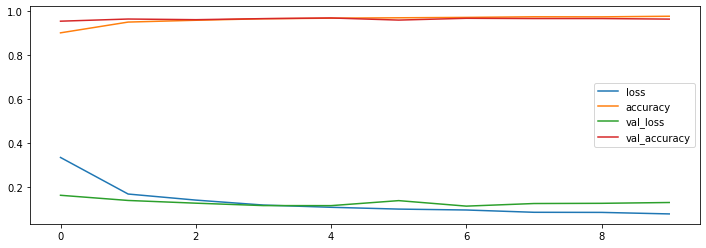

In [21]:
df.plot(figsize=(12,4))

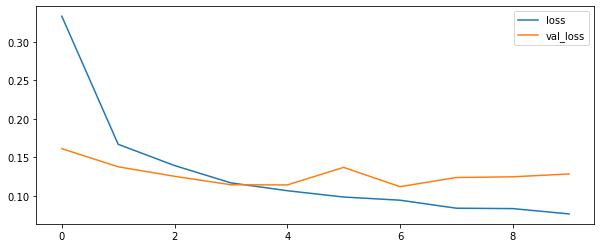

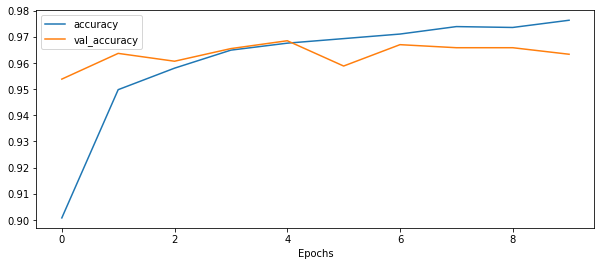

In [37]:
df[['loss','val_loss']].plot(figsize=(10,4))
df[['accuracy','val_accuracy']].plot(figsize=(10,4))
plt.xlabel('Epochs')
plt.legend()

In [23]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))

<class 'list'>


In [24]:
print('Test score: ', score[0])
print('Test accuracy: ', score[1])

Test score:  0.15134388575116173
Test accuracy:  0.9595


In [25]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)

In [26]:
image = Image.open(response.raw)



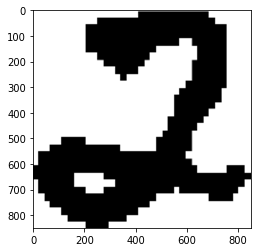

In [27]:
plt.imshow(image)

In [28]:
import cv2

image_array = np.asarray(image)

In [29]:
image_array.shape

(850, 850, 4)

In [30]:
resized = cv2.resize(image_array,(28,28)) # 28*28 크기이므로바꿔줘야함
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

In [31]:
image = cv2.bitwise_not(gray_scale) #우리가 학습시킨건 숫자가 흰색 배경이 검정이므로 바꿔줘야함

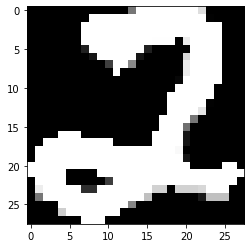

In [32]:
plt.imshow(image,cmap='gray')

In [33]:
image = image*255

In [34]:
image = image.reshape(1,-1)

In [35]:
prediction = model.predict_classes(image)

In [36]:
prediction

array([9])